In [501]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from scipy.stats import pearsonr, chi2_contingency, mode
from sklearn.linear_model import LinearRegression

<h3>El propisto de esta seccion es analizar (Group Age - Segmento) respecto a Bicicletas</h3>

Group Age -> Grupos de edad de cada cliente

Segmento -> Segmentacion de biciletas de acuerdo a su precio 

Rango de precios usados en segmentacion ->

    •	Low End (540 – 1552)

    •	Medium End (1553 – 2564)
    
    •	High End (2565 – 3576)


In [502]:
df = pd.read_csv("Sales.csv")

In [503]:
# Funcion para agregar segmentacion a cada renglon 
def bike_segment_fun(x):

    if x > 500 and x <= 1552:
        return "Low End"

    elif x > 1552 and x < 2564:
        return "Medium End"
        
    elif x > 2564:
        return "High End"

In [504]:
# Crear df solo con ventas categorizadas como bicicletas 
df = df[df.Product_Category == "Bikes"]

In [505]:
# Aplicar funcion bike_segment_fun a df, nombre de nueva columna Bike_Segmentation
df["Bike_Segmentation"] = df.Unit_Price.apply(bike_segment_fun)

<Figure size 432x288 with 0 Axes>

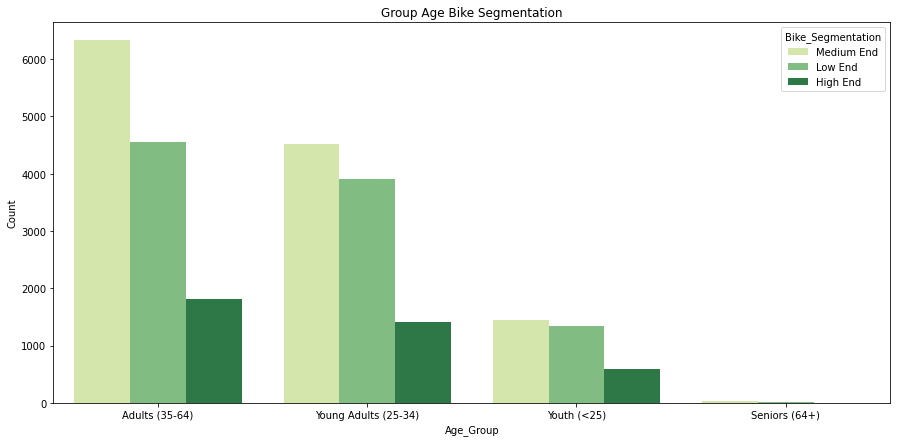

In [506]:
# Analizar cada Group Age con sus porcentajes de Bike Segmentation
age_group_bike_seg = pd.DataFrame(df.groupby("Age_Group").Bike_Segmentation.value_counts())

# Crear una sola tabla, incluir index en valores
temp_df = age_group_bike_seg.index

count = age_group_bike_seg["Bike_Segmentation"].values
age_group = []
bike_segmentation = []

for value in temp_df:
    age_group.append(value[0])
    bike_segmentation.append(value[1])

dicc_age_bike_seg = {"Age_Group": age_group, "Bike_Segmentation": bike_segmentation, "Count": count}

df_age_bike = pd.DataFrame.from_dict(dicc_age_bike_seg)

plt.clf()
fig, axes = plt.subplots(figsize = (15, 7))
order_table =  ["Adults (35-64)", "Young Adults (25-34)", "Youth (<25)", "Seniors (64+)"]
sns.barplot(data = df_age_bike, x = "Age_Group", y = "Count", hue = "Bike_Segmentation", order = order_table, palette = "YlGn")
axes.set_title("Group Age Bike Segmentation")
plt.show()

<h3>El proposito de esta seccion es analizar (Group Age - Subcategoria) respecto a Bicicletas</h3>

Group Age -> Grupo de edad de cada cliente

Subcategoria -> Categorias de bicicletas

Tipos de subcategorias ->

    •	Road Bike

    •	Mountain Bike
    
    •	Touring Bike


<Figure size 432x288 with 0 Axes>

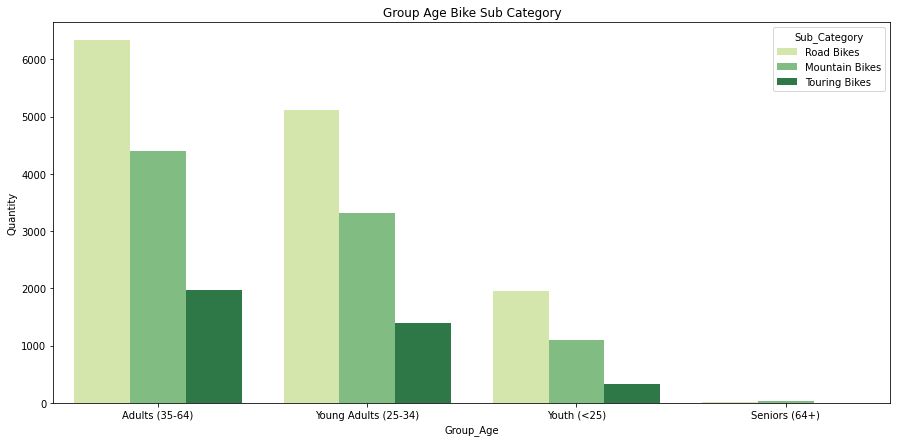

In [507]:
# Analizar cada Group Age con su procentaje de Subcategorias 
age_group_subcat = pd.DataFrame(df.groupby("Age_Group").Sub_Category.value_counts())

# Crear una sola tabla incluir index en los valores
index_values = age_group_subcat.index
quantity = age_group_subcat["Sub_Category"].values
group_age = []
sub_cat = []

for value in index_values:
    group_age.append(value[0])
    sub_cat.append(value[1])

dicc_age_subcat = {"Group_Age": group_age, "Sub_Category": sub_cat, "Quantity": quantity}

df_age_subcat = pd.DataFrame.from_dict(dicc_age_subcat)

plt.clf()
fig, axes = plt.subplots(figsize = (15, 7))
sns.barplot(data = df_age_subcat, x = "Group_Age", y ="Quantity", hue = "Sub_Category", order = order_table, palette = "YlGn")
axes.set_title("Group Age Bike Sub Category")
plt.show()

<h3>El proposito de esta seccion es analizar la linea de tiempo respecto a las ventas en Bicicletas</h3>
Tiempo -> Fecha en la que la venta fue realizada

Ventas -> Monto total de la venta realziada en la fecha

In [508]:
# Realizar diferentes tablas para cada ano o unir en una para predecir ventas 

# Total de anos dentro de mi df
print("Anos Totales: ", df.Year.unique())

df_timeline = list(df.groupby("Year"))

Anos Totales:  [2013 2015 2014 2016 2012 2011]


C:\Users\JUANME~1\AppData\Local\Temp/ipykernel_20408/2713140305.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i][j].set_xticklabels(labels = months, rotation = 50)
C:\Users\JUANME~1\AppData\Local\Temp/ipykernel_20408/2713140305.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i][j].set_xticklabels(labels = months, rotation = 50)
C:\Users\JUANME~1\AppData\Local\Temp/ipykernel_20408/2713140305.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i][j].set_xticklabels(labels = months, rotation = 50)
C:\Users\JUANME~1\AppData\Local\Temp/ipykernel_20408/2713140305.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i][j].set_xticklabels(labels = months, rotation = 50)
C:\Users\JUANME~1\AppData\Local\Temp/ipykernel_20408/2713140305.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i][j].set_xticklabe

<Figure size 432x288 with 0 Axes>

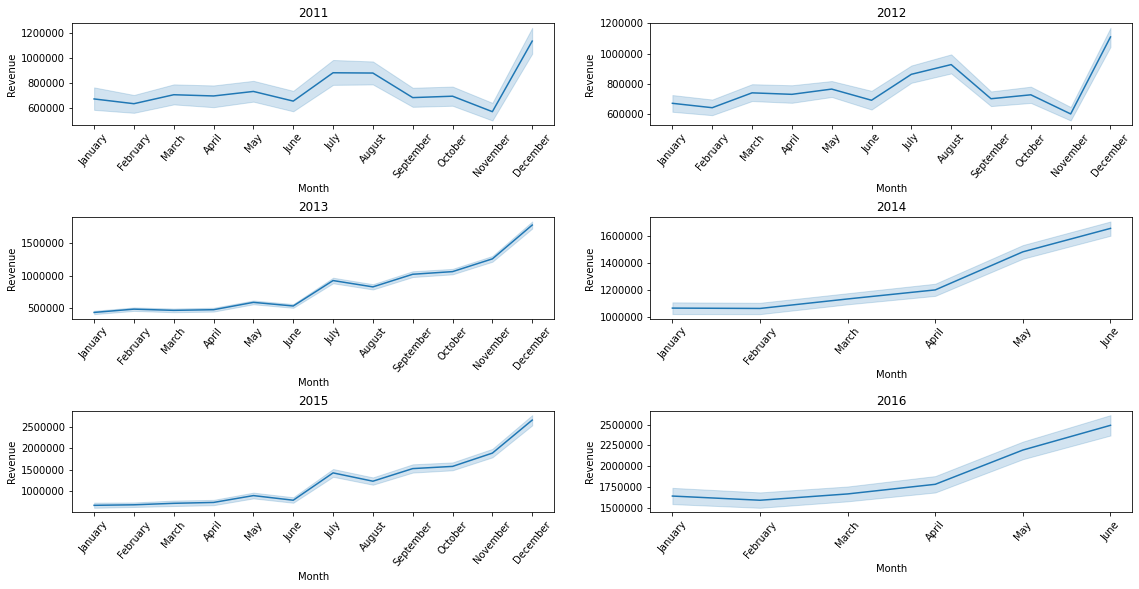

In [509]:
# Iteracion por cada ano haciendo una grafica
plt.clf()

fig, axes = plt.subplots(3, 2, figsize = (19, 9))

i = 0
j = 0

ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

for year, df in df_timeline:
    if j == 2:
        i += 1
        j = 0

    # Creamos una serie de tipo categoria anted de darle su orden
    df.Month = pd.Series(df.Month).astype("category")

    # Creamos o mejor dicho damos los valores en orden 
    df.Month = df.Month.cat.set_categories(ordered_months, ordered = True)

    sns.lineplot(ax = axes[i][j], data = df, x = "Month", y = "Revenue", estimator = sum, palette = "YlGn")
        
    axes[i][j].set_title(year)

    months = df.Month.unique()

    months = list(months.sort_values())

    axes[i][j].set_xticklabels(labels = months, rotation = 50)

    axes[i][j].ticklabel_format(style = "plain", axis = "y")

    j += 1

plt.subplots_adjust(hspace = 0.9)
    
plt.show()   


In [510]:
# Unir anos desde el 2011 - 2013
# wanted_years = [2011, 2012, 2013]

# month_years = []

# revenue = []

# def concatenate(x):
#     month_date = str(x.Month + "_" + str(x.Year))
#     return month_date


# for year, df in df_timeline:
#     if year in wanted_years:
#         df["Month_Year"] = df.apply(concatenate, axis = 1)

#         for a, b in zip(df.Month_Year, df.Revenue):
#             month_years.append(a)
#             revenue.append(b)

# temp_dicc = {"Month_Year": month_years, "Revenue": revenue}

# temp_df = pd.DataFrame.from_dict(temp_dicc)

# plt.clf()
# plt.figure(figsize = (16, 7))
# sns.lineplot(data = temp_df, x = "Month_Year", y = "Revenue", estimator = sum)
# plt.xticks(rotation = 80)
# plt.ticklabel_format(style = "plain", axis = "y")
# plt.title("2011 - 2012 - 2013 Bike Revenue x Month")
# plt.show()

</h3>Dado que los anos 2014 y 2016 tienen meses pendientes usaremos regression lineal para predecir sus ventas </h3>

In [511]:
# Obtener mis x_values con una sola variable despues intentar con multivaribales y dar valores a predecir que son Y
wanted_years = [2014, 2016]

temp_dicc = {2014:[], 2016:[]}

for year, df in df_timeline:

    if year in wanted_years:

        temp_table = df.groupby("Month").Revenue.sum().reset_index()

        x_values = temp_table.Month[:6]

        y_values = temp_table.Revenue[:6]

        x_values = [x  for x in x_values.index]

        x_values = np.array(x_values).reshape(-1, 1)

        y_values = np.array(y_values).reshape(-1, 1)

        reg = LinearRegression().fit(x_values, y_values)

        # print(reg.score(x_values, y_values))

        x_second_values = temp_table.Month[6:]

        x_second_values = [x for x in x_second_values.index]

        x_second_values = np.array(x_second_values).reshape(-1, 1)

        y_predicted_values = reg.predict(x_second_values)

        temp_dicc[year].append(x_second_values)
        temp_dicc[year].append(y_predicted_values)


<Figure size 432x288 with 0 Axes>

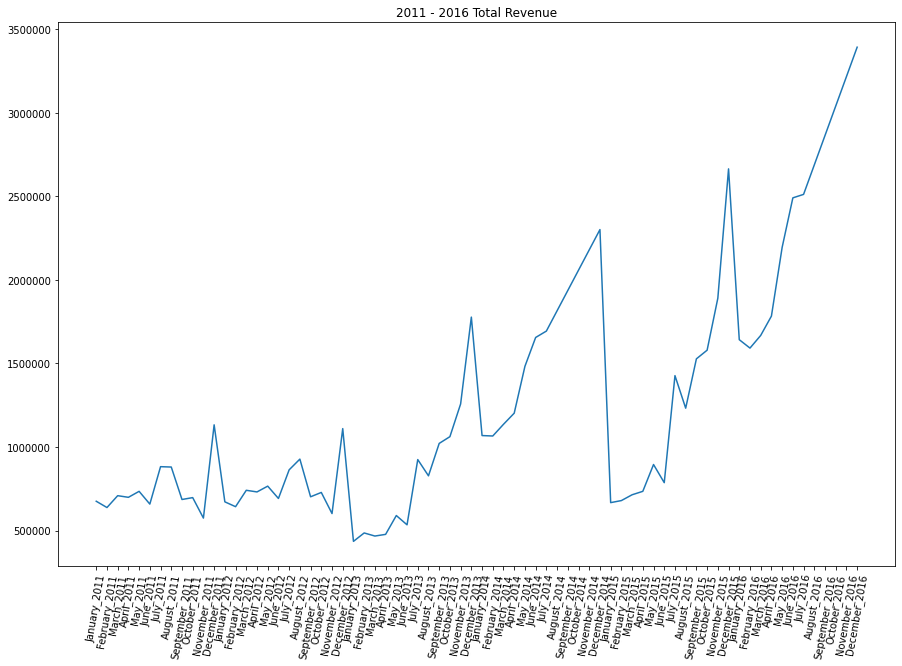

In [580]:
wanted_years = [2014, 2016]
total_dicc = {}

revenue = []
month_years =[]

for year, df in df_timeline:

    if year in wanted_years:

        temp_table = df.groupby("Month").Revenue.sum().reset_index()

        # print(temp_table)

        valores_indices = temp_dicc[year][0].reshape(1, -1)[0]
        # print(valores_indices)

        valores_predictos = temp_dicc[year][1].reshape(1, -1)[0]
        valores_predictos = [round(x) for x in valores_predictos]
        


        for i in range(len(valores_indices)):
            temp_table.iat[valores_indices[i], 1] = valores_predictos[i]

    else:
        temp_table = df.groupby("Month").Revenue.sum().reset_index()

    temp_table["Month_Year"] = temp_table.Month.astype("string") + "_" + str(year)
    
    month_years.append(temp_table.Month_Year)

    revenue.append(temp_table.Revenue)

month_year = []
revenue_good = []

for lista1, lista2 in zip(month_years, revenue):
    for date in lista1:
        month_year.append(date)
    for date in lista2:
        revenue_good.append(date)
  

plt.clf()
plt.figure(figsize = (15, 10))
plt.plot(month_year, revenue_good, )
plt.xticks(rotation = 80)
plt.title("2011 - 2016 Total Revenue")
plt.ticklabel_format(style = "plain", axis = "y")
plt.show()
